<a href="https://colab.research.google.com/github/ToniMarGar/Final_Project-Clothify/blob/main/Proyecto_final_Clothify_test_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

#DESCOMPRIME EL ZIP

#Ruta al archivo .zip y la carpeta de destino
archivo_zip = 'img(2).zip'
carpeta_destino = '/content/'

#Descomprimir el archivo .zip
with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
import pandas as pd
import os

#CREA UN DF QUE TENGA TODAS LAS IMAGENES DE IMG, TENIENDO UN DF
#QUE TENGA URL, ITEM_ID , TYPE


# Leer el archivo .txt en un DataFrame de pandas
df = pd.read_csv('list_eval_partition.txt', delim_whitespace=True, on_bad_lines='skip')

# Filtrar para mantener solo las filas que contienen 'front' en el nombre de la imagen
df = df[df['image_name'].str.contains('front')]

# Función para extraer el tipo de prenda del nombre del archivo
def obtener_tipo_de_prenda(image_name):
    parts = image_name.split('/')
    if len(parts) > 2:
        prenda = parts[1]+'_'+parts[2]  # "Dresses" en el caso de la ruta 'WOMEN/Dresses'
        return prenda

# Función para verificar si el archivo existe
def archivo_existe(image_name):
    return os.path.isfile(image_name)  # Verifica si el archivo existe en el sistema de archivos local

# Filtrar solo las filas con imágenes cuyo archivo existe
df = df[df['image_name'].apply(archivo_existe)]

# Aplicar la función para extraer el tipo de prenda
df['type'] = df['image_name'].apply(obtener_tipo_de_prenda)

# Seleccionar las columnas deseadas
df = df[['image_name', 'item_id', 'type']]

# Guardar el nuevo archivo .txt con la nueva estructura
# df.to_csv('archivo_modificado.txt', index=False, sep='\t')

# Mostrar el resultado
print(df)



Empty DataFrame
Columns: [image_name, item_id, type]
Index: []


<ipython-input-2-eba6f4f74922>:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('list_eval_partition.txt', delim_whitespace=True, on_bad_lines='skip')


In [ ]:
import pandas as pd



# Supongamos que tu DataFrame está almacenado en la variable df
# Obtener 5 filas aleatorias de cada grupo 'type'
random_samples = df.groupby('type').apply(lambda x: x.sample(min(5, len(x)))).reset_index(drop=True)
uniques_types = df['type'].unique()

# Mostrar el resultado
print(random_samples)


                                          image_name      item_id  \
0           img/MEN/Denim/id_00001198/04_1_front.jpg  id_00001198   
1           img/MEN/Denim/id_00000089/03_1_front.jpg  id_00000089   
2           img/MEN/Denim/id_00000089/18_1_front.jpg  id_00000089   
3           img/MEN/Denim/id_00005769/02_1_front.jpg  id_00005769   
4           img/MEN/Denim/id_00004807/01_1_front.jpg  id_00004807   
..                                               ...          ...   
110  img/WOMEN/Tees_Tanks/id_00000667/01_1_front.jpg  id_00000667   
111  img/WOMEN/Tees_Tanks/id_00000343/06_1_front.jpg  id_00000343   
112  img/WOMEN/Tees_Tanks/id_00003523/62_1_front.jpg  id_00003523   
113  img/WOMEN/Tees_Tanks/id_00006375/01_1_front.jpg  id_00006375   
114  img/WOMEN/Tees_Tanks/id_00005428/01_1_front.jpg  id_00005428   

                 type  
0           MEN_Denim  
1           MEN_Denim  
2           MEN_Denim  
3           MEN_Denim  
4           MEN_Denim  
..                ...  
110

<ipython-input-7-9004a2017a2d>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  random_samples = df.groupby('type').apply(lambda x: x.sample(min(5, len(x)))).reset_index(drop=True)


In [ ]:
# Modelo preentrenado
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

In [ ]:
import os
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras.preprocessing import image



# Función para procesar y generar embeddings para una lista de imágenes
def process_images(image_paths):
    embeddings = []

    for img_path in image_paths:
        # Verificar que sea una imagen válida
        if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
            try:
                # Cargar y procesar la imagen
                img = image.load_img(img_path, target_size=(224, 224))
                img_array = image.img_to_array(img)
                img_array = np.expand_dims(img_array, axis=0)
                img_array = preprocess_input(img_array)

                # Generar embeddings para la imagen
                embedding = model.predict(img_array)
                embeddings.append(embedding)

            except Exception as e:
                print(f"Error al procesar la imagen {img_path}: {e}")

    # Convertir la lista de embeddings en un array numpy
    return np.vstack(embeddings) if embeddings else np.array([])

# Obtener la lista de URLs de las imágenes
image_urls = random_samples['image_name']

# Procesar las imágenes y generar embeddings
embeddings = process_images(image_urls)

# Guardar los embeddings en un archivo .npy
np.save('embeddings.npy', embeddings)

print(f"Embeddings generados: {embeddings.shape}")
print(embeddings)



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
import urllib

url, filename = ("https://images.canadagoose.com/image/upload/w_640,c_scale,f_auto,q_auto/v1724965602/product-image/7999M_66_a.jpg", "image-test.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

try:
    # Cargar y procesar la imagen
    img = image.load_img(filename, target_size=(224, 224))  # ResNet50 espera imágenes de 224x224
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expandir dimensiones para batch
    img_array = preprocess_input(img_array)  # Preprocesar para el modelo

    # Generar el embedding
    embedding_user = model.predict(img_array)

    print(f"Shape del embedding: {embedding_user.shape}")
    print(f"Embedding generado:\n{embedding_user}")
except Exception as e:
    print(f"Error al procesar la imagen {filename}: {e}")

Error al procesar la imagen image-test.jpg: name 'preprocess_input' is not defined


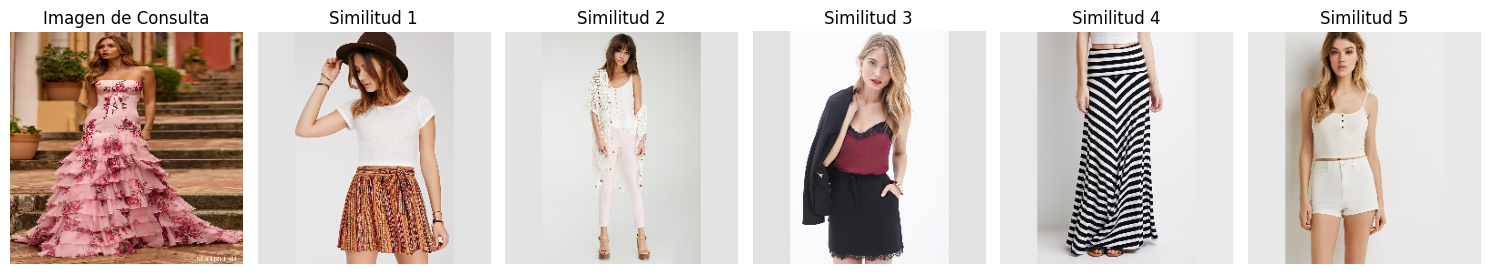

Índice de la imagen más similar: [62 35 60 61 57]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import os
from PIL import Image
import matplotlib.pyplot as plt

# Para mostrar imágenes almacenadas como numpy arrays:
def show_images(query_image, similar_images):
    fig, axes = plt.subplots(1, len(similar_images) + 1, figsize=(15, 5))

    # Mostrar la imagen de consulta (ya en numpy.ndarray)
    axes[0].imshow(query_image)
    axes[0].axis('off')
    axes[0].set_title("Imagen de Consulta")

    # Mostrar las imágenes similares (las cargas desde los archivos)
    for i, filename in enumerate(similar_images):
        img_path = os.path.join(filename)

        # Aquí se usa PIL solo si necesitas abrir una imagen desde un archivo
        img = Image.open(img_path)
        img = np.array(img)  # Convertir a numpy.ndarray si es necesario

        axes[i + 1].imshow(img)
        axes[i + 1].axis('off')
        axes[i + 1].set_title(f"Similitud {i+1}")

    plt.tight_layout()
    plt.show()

# Función para encontrar las 5 imágenes más similares
def find_most_similar_images(embedding_user, embeddings, top_n=5):
    # Asegúrate de que las dimensiones sean correctas
    embedding_user = embedding_user.squeeze()  # Remover dimensiones adicionales si existen
    embeddings = embeddings.squeeze()  # Remover dimensiones adicionales si existen

    # Calcular la similitud coseno entre el embedding del usuario y el resto
    similarities = cosine_similarity(embedding_user.reshape(1, -1), embeddings)

    # Obtener los índices de las top_n imágenes más similares
    most_similar_indices = np.argsort(similarities[0])[::-1][:top_n]
    return most_similar_indices


most_similar_index = find_most_similar_images(embedding_user, embeddings)

# Obtener los enlaces correspondientes a los índices
similar_images_list = [image_urls[i] for i in most_similar_index]

show_images(img, similar_images_list)

print("Índice de la imagen más similar:", most_similar_index)

In [ ]:
print(len(uniques_types))

17


In [ ]:
print(df['image_name'][0])
print(df['type'][0])

img/WOMEN/Dresses/id_00000002/02_1_front.jpg
Dresses


In [ ]:
'''
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Configuración inicial
IMG_SIZE = (224, 224)  # Tamaño de entrada esperado por MobileNetV2
BATCH_SIZE = 16
labels = df['type']  # Etiquetas correspondientes

# Paso 1: Convertir las etiquetas de texto en números
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# El número de clases será el número único de etiquetas
NUM_CLASSES = len(label_encoder.classes_)  # Esto da el número de clases únicas

# Crear un diccionario para mapear las etiquetas numéricas a las originales
class_names = label_encoder.classes_

# Definir el generador de datos para entrenamiento y validación
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalización
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Solo normalización para la validación

# Crear el flujo de datos para el entrenamiento
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory=None,  # Si tienes rutas absolutas, usa directory='/path/a/las/imagenes'
    x_col='image_name',
    y_col='type',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse'  # Usar 'sparse' porque las etiquetas están codificadas como enteros
)

# Crear el flujo de datos para la validación
val_generator = val_datagen.flow_from_dataframe(
    dataframe=df,
    directory=None,  # Al igual que antes, usa directory='/path/a/las/imagenes'
    x_col='image_name',
    y_col='type',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse'
)

# Crear el modelo base
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False  # Congelar las capas base inicialmente

# Añadir capas personalizadas
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar las capas superiores
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Descongelar las capas base para fine-tuning
base_model.trainable = True
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo completo
history_fine = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Guardar el modelo
model.save('fine_tuned_model.h5')
'''

Found 14950 validated image filenames belonging to 17 classes.
Found 14950 validated image filenames belonging to 17 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


935/935 ━━━━━━━━━━━━━━━━━━━━ 247s 252ms/step - accuracy: 0.2435 - loss: 2.4813 - val_accuracy: 0.4603 - val_loss: 1.7062
Epoch 2/10
935/935 ━━━━━━━━━━━━━━━━━━━━ 241s 256ms/step - accuracy: 0.3875 - loss: 1.8846 - val_accuracy: 0.5038 - val_loss: 1.4978
Epoch 3/10
935/935 ━━━━━━━━━━━━━━━━━━━━ 253s 246ms/step - accuracy: 0.4357 - loss: 1.7125 - val_accuracy: 0.5272 - val_loss: 1.3984
Epoch 4/10
935/935 ━━━━━━━━━━━━━━━━━━━━ 261s 246ms/step - accuracy: 0.4590 - loss: 1.6198 - val_accuracy: 0.5410 - val_loss: 1.3414
Epoch 5/10
935/935 ━━━━━━━━━━━━━━━━━━━━ 245s 228ms/step - accuracy: 0.4723 - loss: 1.5659 - val_accuracy: 0.5565 - val_loss: 1.2891
Epoch 6/10
935/935 ━━━━━━━━━━━━━━━━━━━━ 227s 242ms/step - accuracy: 0.4866 - loss: 1.4982 - val_accuracy: 0.5622 - val_loss: 1.2563
Epoch 7/10
935/935 ━━━━━━━━━━━━━━━━━━━━ 211s 225ms/step - accuracy: 0.4981 - loss: 1.4730 - val_accuracy: 0.5730 - val_loss: 1.2390
Epoch 8/10
935/935 ━━━━━━━━━━━━━━━━━━━━ 231s 245ms/step - accuracy: 0.5049 - loss: 1.44

In [ ]:
'''

import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Cargar y preprocesar la imagen
img_path = "IMG_20250115_154116.jpg"  # Ruta de la imagen
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)  # Añadir dimensión para batch (1, 224, 224, 3)

# Hacer la predicción
predictions = model.predict(img_array)

# Obtener la clase predicha (índice con mayor probabilidad)
predicted_class = np.argmax(predictions, axis=1)

# Mapear el índice a la etiqueta de texto
predicted_label = class_names[predicted_class[0]]  # Usamos la clase correspondiente

print(f"Predicción: {predicted_label}")
print(uniques_types)
'''

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicción: Sweatshirts_Hoodies
['Dresses' 'Skirts' 'Blouses_Shirts' 'Sweatshirts_Hoodies' 'Cardigans'
 'Jackets_Coats' 'Sweaters' 'Tees_Tanks' 'Shorts' 'Rompers_Jumpsuits'
 'Graphic_Tees' 'Pants' 'Denim' 'Jackets_Vests' 'Leggings' 'Shirts_Polos'
 'Suiting']


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import ParameterGrid

# Configuración inicial
IMG_SIZE = (224, 224)  # Tamaño de entrada esperado por ResNet50
labels = df['type']  # Etiquetas correspondientes

# Paso 1: Convertir las etiquetas de texto en números
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# El número de clases será el número único de etiquetas
NUM_CLASSES = len(label_encoder.classes_)

# Crear un diccionario para mapear las etiquetas numéricas a las originales
class_names = label_encoder.classes_

# Generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Grid Search: Parámetros
param_grid = {
    'batch_size': [16, 32, 64],
    'learning_rate': [1e-2, 1e-3, 1e-4]
}
grid = ParameterGrid(param_grid)

# Variables para almacenar los resultados
best_val_accuracy = 0
best_params = None

# Grid Search
for params in grid:
    batch_size = params['batch_size']
    learning_rate = params['learning_rate']

    # Crear generadores de datos
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=df,
        directory=None,
        x_col='image_name',
        y_col='type',
        target_size=IMG_SIZE,
        batch_size=batch_size,
        class_mode='sparse'
    )

    val_generator = val_datagen.flow_from_dataframe(
        dataframe=df,
        directory=None,
        x_col='image_name',
        y_col='type',
        target_size=IMG_SIZE,
        batch_size=batch_size,
        class_mode='sparse'
    )

    # Crear el modelo base
    base_model = tf.keras.applications.ResNet152V2(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # Congelar capas base inicialmente

    # Añadir capas personalizadas
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])

    # Compilar el modelo
    model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Entrenar el modelo
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=5,  # Reducido para pruebas rápidas
        verbose=1
    )

    # Evaluar la precisión en el conjunto de validación
    val_accuracy = max(history.history['val_accuracy'])
    print(f"Batch size: {batch_size}, Learning rate: {learning_rate}, Val Accuracy: {val_accuracy}")

    # Actualizar los mejores parámetros
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_params = params

# Resultados finales
print(f"Mejores parámetros: {best_params}, Mejor precisión de validación: {best_val_accuracy}")

Found 12861 validated image filenames belonging to 23 classes.
Found 12861 validated image filenames belonging to 23 classes.
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.2242 - loss: 2.8332

KeyboardInterrupt: 

Intento de finetunning de resnet

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Configuración inicial
IMG_SIZE = (224, 224)  # Tamaño de entrada esperado por ResNet50
BATCH_SIZE = 32
labels = df['type']  # Etiquetas correspondientes

# Paso 1: Convertir las etiquetas de texto en números
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# El número de clases será el número único de etiquetas
NUM_CLASSES = len(label_encoder.classes_)

# Crear un diccionario para mapear las etiquetas numéricas a las originales
class_names = label_encoder.classes_

# Definir el generador de datos para entrenamiento y validación
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalización
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Solo normalización para la validación

# Crear el flujo de datos para el entrenamiento
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory=None,  # Si tienes rutas absolutas, usa directory='/path/a/las/imagenes'
    x_col='image_name',
    y_col='type',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse'  # Usar 'sparse' porque las etiquetas están codificadas como enteros
)

# Crear el flujo de datos para la validación
val_generator = val_datagen.flow_from_dataframe(
    dataframe=df,
    directory=None,  # Al igual que antes, usa directory='/path/a/las/imagenes'
    x_col='image_name',
    y_col='type',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse'
)

# Crear el modelo base
base_model = tf.keras.applications.ResNet152V2(input_shape=(224, 224, 3),
                                            include_top=False,
                                            weights='imagenet')
base_model.trainable = False  # Congelar las capas base inicialmente

# Añadir capas personalizadas
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar las capas superiores
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Descongelar las capas base para fine-tuning
base_model.trainable = True
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),  # Reducir el learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo completo
history_fine = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Guardar el modelo
model.save('resnet152v2_fine_tuned_model.h5')


Found 12861 validated image filenames belonging to 23 classes.
Found 12861 validated image filenames belonging to 23 classes.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


402/402 ━━━━━━━━━━━━━━━━━━━━ 304s 674ms/step - accuracy: 0.1860 - loss: 2.9036 - val_accuracy: 0.4125 - val_loss: 1.9512
Epoch 2/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 285s 612ms/step - accuracy: 0.3474 - loss: 2.1772 - val_accuracy: 0.4775 - val_loss: 1.6666
Epoch 3/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 247s 607ms/step - accuracy: 0.3848 - loss: 1.9969 - val_accuracy: 0.4953 - val_loss: 1.5442
Epoch 4/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 259s 603ms/step - accuracy: 0.4143 - loss: 1.8747 - val_accuracy: 0.5289 - val_loss: 1.4367
Epoch 5/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 246s 607ms/step - accuracy: 0.4423 - loss: 1.7782 - val_accuracy: 0.5454 - val_loss: 1.3787
Epoch 6/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 260s 601ms/step - accuracy: 0.4464 - loss: 1.7135 - val_accuracy: 0.5562 - val_loss: 1.3311
Epoch 7/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 264s 605ms/step - accuracy: 0.4724 - loss: 1.6446 - val_accuracy: 0.5682 - val_loss: 1.2973
Epoch 8/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 260s 602ms/step - accuracy: 0.4694 - loss: 1.62

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity


# Función para obtener embedding de una imagen
def get_embedding(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Redimensionar la imagen a 224x224
    img_array = image.img_to_array(img)  # Convertir a array
    img_array = np.expand_dims(img_array, axis=0)  # Añadir una dimensión extra para el batch
    img_array = preprocess_input(img_array)  # Preprocesar la imagen según el modelo

    embedding = model.predict(img_array)  # Obtener el embedding
    return embedding

# Paso 2: Obtener embeddings para todas las imágenes en tu lista de direcciones
# Aquí se pasa directamente una lista de rutas de las imágenes en lugar de una carpeta
image_paths_list = ['1.jpg','2.jpg','3.jpg','4.jpg']

embeddings = []

for img_path in image_paths_list:
    embedding = get_embedding(img_path)
    embeddings.append(embedding)

# Convertir la lista de embeddings en un array numpy
embeddings = np.array(embeddings).squeeze()

# Paso 3: Comparar con un embedding específico
# Aquí pones la imagen con la que deseas hacer la comparación
target_image_path = 'imagen-prueba.jpg'  # Imagen de referencia
target_embedding = get_embedding(target_image_path)

# Paso 4: Calcular similitud coseno entre el embedding de la imagen objetivo y todos los demás
cosine_similarities = cosine_similarity(target_embedding, embeddings)

# Paso 5: Obtener las 10 imágenes más similares
top_10_indices = np.argsort(cosine_similarities[0])[::-1][:10]

print("Top 10 imágenes más similares:")
for idx in top_10_indices:
    print(f"Imagen: {image_paths_list[idx]} | Similitud: {cosine_similarities[0][idx]}")


FileNotFoundError: [Errno 2] No such file or directory: '1.jpg'

In [ ]:
def predict_image(image_path):
    # Cargar la imagen
    img = image.load_img(image_path, target_size=(224, 224))  # Redimensionar la imagen
    img_array = image.img_to_array(img)  # Convertir la imagen a un array
    img_array = np.expand_dims(img_array, axis=0)  # Añadir una dimensión extra para el batch
    img_array = preprocess_input(img_array)  # Preprocesar la imagen para ResNet50

    # Realizar la predicción
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)  # Clase predicha

    return predicted_class

# Predicción de una nueva imagen
image_path = '3.jpg'
predicted_class = predict_image(image_path)
print(f"Predicción: {predicted_class}")
print(class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicción: 12
WOMEN_Dresses


PRUEBA DE RESNET101 SIN ENTRENAR

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

# Asegúrate de que la GPU está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Definir las transformaciones para la entrada de la red
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Cargar ResNet101 preentrenado
model = models.resnet152(weights=models.ResNet152_Weights.DEFAULT)
model = model.to(device)

# Modificar la última capa para tus clases específicas
class_names = ['shirt','pant','skirt','sweater']
model.fc = nn.Linear(model.fc.in_features, len(class_names))  # Cambiar la última capa

model.eval()  # Cambiar a modo evaluación

def predict_image(image_path):
    """
    Función para predecir el tipo de prenda a partir de una imagen.
    """
    # Abrir la imagen y aplicar las transformaciones
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0).to(device)  # Añadir batch dimension

    # Realizar la predicción
    with torch.no_grad():
        outputs = model(image)
        _, predicted_idx = torch.max(outputs, 1)

    # Mostrar la clase predicha
    predicted_class = class_names[predicted_idx.item()]
    return predicted_class

# Probar con una imagen
image_path = 'calvo.jpg'  # Sustituye esto por el path de tu imagen
prediction = predict_image(image_path)
print(f"Predicción: {prediction}")


KeyboardInterrupt: 

---------------------------------------------------------------------------------------------------------------------------------------------------------
NUEVO
...................................................................................................................................................................................................

In [8]:
import zipfile

#Ruta al archivo .zip y la carpeta de destino
archivo_zip = 'mini_dataset.zip'
carpeta_destino = '/content/'

#Descomprimir el archivo .zip
with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    zip_ref.extractall()

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Configuración del generador de datos
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Escalar valores de píxeles
    validation_split=0.2,  #
    rotation_range=20,  # Rotar imágenes hasta 20 grados
    width_shift_range=0.2,  # Desplazar horizontalmente hasta un 20%
    height_shift_range=0.2,  # Desplazar verticalmente hasta un 20%
    horizontal_flip=True # Voltear horizontalmente
)

# Rutas
dataset_path = "/content/dataset"
target_size = (224, 224)  # Tamaño esperado por ResNet152V2
batch_size = 16

# Generadores de datos
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=target_size,
    batch_size=16,
    subset='training',
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=target_size,
    batch_size=16,
    subset='validation',
    class_mode='categorical'
)


Found 915 images belonging to 23 classes.
Found 228 images belonging to 23 classes.


PRUEBA GPT

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Cargar el modelo base preentrenado
base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Congelar las capas del modelo base

# Añadir capas personalizadas para generar embeddings
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', name="embedding_layer")(x)  # Capa de embeddings
x = Dropout(0.5)(x)  # Regularización
embeddings = Dense(train_generator.num_classes, activation='softmax')(x)

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=embeddings)

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Crear generador con aumento de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Rutas
dataset_path = "/content/dataset"
target_size = (224, 224)  # Tamaño esperado por ResNet152V2
batch_size = 16

# Generadores de datos
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=target_size,
    batch_size=16,
    subset='training',
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=target_size,
    batch_size=16,
    subset='validation',
    class_mode='categorical'
)

# Entrenar el modelo
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Descongelar algunas capas para fine-tuning
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Recompilar con una tasa de aprendizaje más baja
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar nuevamente con fine-tuning
fine_tune_history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Found 915 images belonging to 23 classes.
Found 228 images belonging to 23 classes.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 79s 803ms/step - accuracy: 0.1130 - loss: 3.3572 - val_accuracy: 0.3377 - val_loss: 2.2600
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 263ms/step - accuracy: 0.3014 - loss: 2.2692 - val_accuracy: 0.3553 - val_loss: 2.0042
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 264ms/step - accuracy: 0.3889 - loss: 1.9845 - val_accuracy: 0.3684 - val_loss: 1.9114
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 253ms/step - accuracy: 0.3857 - loss: 1.9299 - val_accuracy: 0.3991 - val_loss: 1.8186
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 260ms/step - accuracy: 0.4622 - loss: 1.6686 - val_accuracy: 0.4079 - val_loss: 1.8372
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 253ms/step - accuracy: 0.4713 - loss: 1.6202 - val_accuracy: 0.4123 - val_loss: 1.7813
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 261ms/step - accuracy: 0.4690 - loss: 1.6002 - val_accuracy: 0.4386 - val_loss: 1.7692
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 261ms/step - accuracy: 0.5186 - loss: 1.4271 - val_accuracy: 0.429

In [4]:
model.save('/content/resnetmodel.h5')

In [7]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import preprocess_input  # Importar preprocess_input

# Crear un modelo que saque solo los embeddings
embedding_model = Model(inputs=model.input, outputs=model.get_layer("embedding_layer").output)

# Función para obtener el embedding de una imagen
def get_embedding(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Redimensionar la imagen a 224x224
    img_array = image.img_to_array(img)  # Convertir la imagen a un array
    img_array = np.expand_dims(img_array, axis=0)  # Añadir una dimensión extra para el batch
    img_array = preprocess_input(img_array)  # Preprocesar la imagen según el modelo

    embedding = embedding_model.predict(img_array)  # Obtener el embedding
    return embedding

# Paso 1: Obtener embeddings para un conjunto de imágenes
image_paths_list = ['/content/id_00000001.jpg', '/content/id_00000068.jpg', '/content/id_00000150.jpg', '/content/id_00000182.jpg', '/content/id_00000234.jpg', '/content/id_00000334.jpg']  # Lista de imágenes
embeddings = []

for img_path in image_paths_list:
    embedding = get_embedding(img_path)
    embeddings.append(embedding)

# Convertir la lista de embeddings en un array numpy
embeddings = np.array(embeddings).squeeze()

# Paso 2: Comparar con un embedding específico (si es necesario)
target_image_path = '/content/efw.jpg'  # Imagen de referencia
target_embedding = get_embedding(target_image_path)

# Paso 3: Calcular similitud coseno entre el embedding de la imagen objetivo y todos los demás
from sklearn.metrics.pairwise import cosine_similarity  # Asegurarse de importar cosine_similarity
cosine_similarities = cosine_similarity(target_embedding, embeddings)

# Paso 4: Obtener las imágenes más similares
top_10_indices = np.argsort(cosine_similarities[0])[::-1][:5]

print("Top 5 imágenes más similares:")
for idx in top_10_indices:
    print(f"Imagen: {image_paths_list[idx]}, Similaridad: {cosine_similarities[0][idx]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Top 5 imágenes más similares:
Imagen: /content/id_00000001.jpg, Similaridad: 0.604087769985199
Imagen: /content/id_00000150.jpg, Similaridad: 0.3888553977012634
Imagen: /content/id_00000334.jpg, Similaridad: 0.34234362840652466
Imagen: /content/id_00000234.jpg, Similaridad: 0.33776623010635376
Imagen: /content/id_00000182.jpg, Similaridad: 0.25364187359809875


In [9]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf

# Crear un modelo que saque solo los embeddings
embedding_model = Model(inputs=model.input, outputs=model.get_layer("embedding_layer").output)

# Función para obtener el embedding de una imagen
def get_embedding(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Redimensionar la imagen a 224x224
    img_array = image.img_to_array(img)  # Convertir la imagen a un array
    img_array = np.expand_dims(img_array, axis=0)  # Añadir una dimensión extra para el batch
    img_array = preprocess_input(img_array)  # Preprocesar la imagen según el modelo

    embedding = embedding_model.predict(img_array)  # Obtener el embedding
    return embedding

# Función para obtener todas las rutas de imágenes en subcarpetas
def get_image_paths_from_subfolders(dataset_folder):
    image_paths = []
    for root, _, files in os.walk(dataset_folder):  # Recorrer todas las subcarpetas
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):  # Filtrar por extensiones de imagen
                image_paths.append(os.path.join(root, file))
    return image_paths

# Paso 1: Obtener embeddings para todas las imágenes en el dataset
dataset_folder = '/content/dataset'  # Carpeta principal del dataset
image_paths_list = get_image_paths_from_subfolders(dataset_folder)

embeddings = []

for img_path in image_paths_list:
    embedding = get_embedding(img_path)
    embeddings.append(embedding)

# Convertir la lista de embeddings en un array numpy
embeddings = np.array(embeddings).squeeze()

# Paso 2: Comparar con un embedding específico (si es necesario)
target_image_path = '/content/gwgr.jpg'  # Imagen de referencia
target_embedding = get_embedding(target_image_path)

# Paso 3: Calcular similitud coseno entre el embedding de la imagen objetivo y todos los demás
cosine_similarities = cosine_similarity(target_embedding, embeddings)

# Paso 4: Obtener las imágenes más similares
top_10_indices = np.argsort(cosine_similarities[0])[::-1][:5]

print("Top 5 imágenes más similares:")
for idx in top_10_indices:
    print(f"Imagen: {image_paths_list[idx]}, Similaridad: {cosine_similarities[0][idx]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

---VGG


In [2]:
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.applications.vgg19 import VGG19
from sklearn.metrics.pairwise import cosine_similarity

Found 1143 images belonging to 23 classes.
Cargando embeddings desde el archivo...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step
Imágenes más similares:
Imagen 972, Similitud: 0.9999999918132622


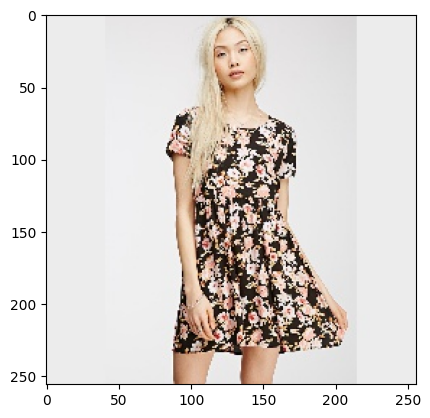

Imagen 994, Similitud: 0.7738490135084124


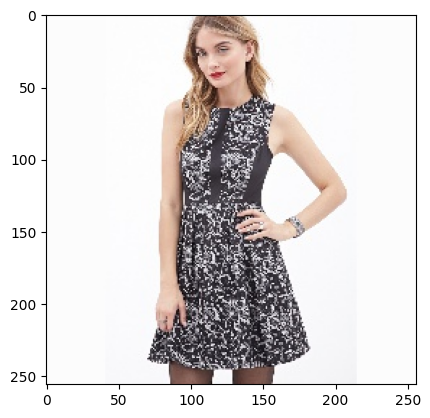

Imagen 421, Similitud: 0.7646702755484228


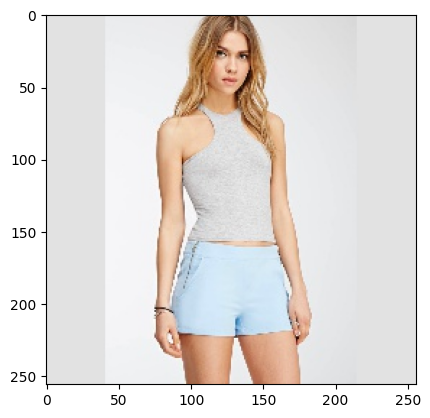

Imagen 147, Similitud: 0.7639232041043851


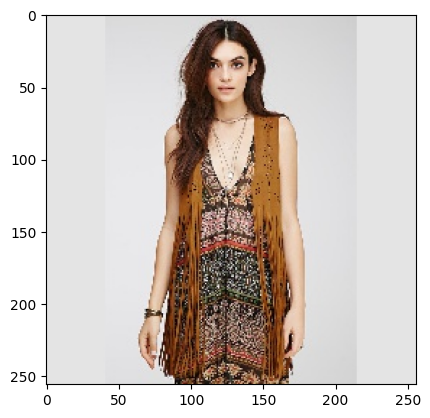

Imagen 97, Similitud: 0.7638555316368572


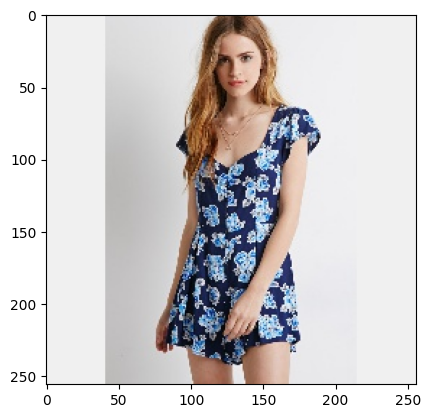

In [52]:
from scipy.spatial.distance import cosine
import numpy as np

reference_image_path = '/content/id_00000002.jpg'  # Ruta de la imagen de referencia

# Función para obtener los embeddings de una imagen
def get_image_embeddings(object_image: Image):
    image_array = np.expand_dims(image.img_to_array(object_image), axis=0)
    image_embedding = vgg19.predict(image_array)  # Usamos el modelo VGG19
    return image_embedding

# Función para obtener la similitud entre dos imágenes utilizando la distancia coseno
def get_cosine_similarity(reference_embedding, image_embedding):
    return 1 - cosine(reference_embedding, image_embedding)  # 1 - distancia coseno para obtener una similitud

# Función para obtener la similitud de una imagen de referencia con otras imágenes en el dataset
def get_similarity_score(reference_image_path, image_paths, embeddings):
    reference_image = load_image(reference_image_path)
    reference_embedding = get_image_embeddings(reference_image)

    similarities = []
    # Comparar el embedding de la imagen de referencia con todos los embeddings del dataset
    for i, embedding in enumerate(embeddings):
        similarity = get_cosine_similarity(reference_embedding.flatten(), embedding.flatten())  # aplanar el embedding
        similarities.append((i, similarity))  # Almacenar el índice y la similitud

    # Ordenar las imágenes por similitud (de mayor a menor)
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)

    return similarities

# Ejemplo de carga de imágenes para entrenamiento
train_datagen = ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory(
    '/content/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Obtener todas las imágenes del dataset
dataset_directory = '/content/dataset'  # Modifica esto con la ruta de tu dataset
image_paths = get_all_image_paths(dataset_directory)

# Verificar si ya existen embeddings guardados
embeddings_file_path = 'image_embeddings.npy'

if os.path.exists(embeddings_file_path):
    print("Cargando embeddings desde el archivo...")
    # Cargar los embeddings almacenados
    embeddings = load_embeddings(embeddings_file_path)
else:
    print("Calculando y guardando embeddings...")
    # Calcular los embeddings para todas las imágenes del dataset
    embeddings = batch_get_image_embeddings(image_paths)
    # Guardar los embeddings para su posterior uso
    save_embeddings(embeddings, embeddings_file_path)

# Calcular las imágenes más similares a una imagen de referencia
similar_images = get_similarity_score(reference_image_path, image_paths, embeddings)

# Mostrar las imágenes más similares
print("Imágenes más similares:")
for idx, score in similar_images[:5]:  # Mostrar las 5 imágenes más similares
    print(f"Imagen {idx + 1}, Similitud: {score}")
    show_image(image_paths[idx])  # Mostrar la imagen


In [58]:
from scipy.spatial.distance import cosine
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import os
from PIL import Image
import matplotlib.pyplot as plt

# Cargar el modelo VGG19 preentrenado sin la capa superior
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Añadir un bloque de capas adicionales para la tarea de clasificación
x = GlobalAveragePooling2D()(vgg19.output)  # GlobalAveragePooling en lugar de Flatten
x = Dense(256, activation='relu')(x)  # Capa densa para más capacidad de aprendizaje
x = Dense(128, activation='relu')(x)  # Otra capa densa para mayor refinamiento
output = Dense(23, activation='softmax')(x)  # 23 clases, activación softmax para clasificación multiclase

# Crear el nuevo modelo
fine_tuned_model = Model(inputs=vgg19.input, outputs=output)

# Congelar las primeras capas de VGG19
for layer in vgg19.layers:
    layer.trainable = False  # No entrenar las capas iniciales

# Descongelar las últimas capas
for layer in fine_tuned_model.layers[-4:]:  # Ajusta esto según las capas finales que quieras descongelar
    layer.trainable = True

# Compilar el modelo con una tasa de aprendizaje pequeña y 'categorical_crossentropy' para clasificación
fine_tuned_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation: Técnicas para aumentar la variabilidad de las imágenes
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Rotaciones aleatorias
    width_shift_range=0.2,  # Desplazamiento horizontal
    height_shift_range=0.2,  # Desplazamiento vertical
    shear_range=0.2,  # Cizallamiento
    zoom_range=0.2,  # Zoom aleatorio
    horizontal_flip=True,  # Volteo horizontal
    fill_mode='nearest'  # Rellenar áreas vacías
)

train_data = train_datagen.flow_from_directory(
    '/content/dataset',  # Ruta a tu dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Como tenemos varias clases, usamos 'categorical'
    shuffle=True  # Mezclar las imágenes para mejorar el entrenamiento
)

# Entrenar el modelo con el dataset
fine_tuned_model.fit(train_data, epochs=10, steps_per_epoch=len(train_data))

# Guardar el modelo afinado después de entrenarlo
fine_tuned_model.save('fine_tuned_model.h5')

# Función para cargar imagen desde archivo local
def load_image(image_path):
    input_image = Image.open(image_path)
    resized_image = input_image.resize((224, 224))
    return resized_image

# Función para obtener los embeddings de una imagen
def get_image_embeddings(object_image: Image):
    image_array = np.expand_dims(image.img_to_array(object_image), axis=0)
    image_embedding = fine_tuned_model.predict(image_array)  # Usamos el modelo fine-tuned
    return image_embedding

# Función para obtener la similitud entre dos imágenes utilizando la distancia coseno
def get_cosine_similarity(reference_embedding, image_embedding):
    return 1 - cosine(reference_embedding, image_embedding)  # 1 - distancia coseno para obtener una similitud

# Función para obtener la similitud de una imagen de referencia con otras imágenes en el dataset
def get_similarity_score(reference_image_path, image_paths, embeddings):
    reference_image = load_image(reference_image_path)
    reference_embedding = get_image_embeddings(reference_image)

    similarities = []
    # Comparar el embedding de la imagen de referencia con todos los embeddings del dataset
    for i, embedding in enumerate(embeddings):
        similarity = get_cosine_similarity(reference_embedding.flatten(), embedding.flatten())  # aplanar el embedding
        similarities.append((i, similarity))  # Almacenar el índice y la similitud

    # Ordenar las imágenes por similitud (de mayor a menor)
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)

    return similarities

# Obtener todas las imágenes del dataset
dataset_directory = '/content/dataset'  # Modifica esto con la ruta de tu dataset
image_paths = [os.path.join(dataset_directory, f) for f in os.listdir(dataset_directory) if f.endswith('.jpg')]  # Asegúrate de que las imágenes sean jpg o el formato adecuado

# Verificar si ya existen embeddings guardados
embeddings_file_path = 'image_embeddings.npy'

if os.path.exists(embeddings_file_path):
    print("Cargando embeddings desde el archivo...")
    # Cargar los embeddings almacenados
    embeddings = np.load(embeddings_file_path)
else:
    print("Calculando y guardando embeddings...")
    # Calcular los embeddings para todas las imágenes del dataset
    embeddings = np.array([get_image_embeddings(load_image(image_path)) for image_path in image_paths])
    # Guardar los embeddings para su posterior uso
    np.save(embeddings_file_path, embeddings)

# Calcular las imágenes más similares a una imagen de referencia
reference_image_path = '/content/id_00000002.jpg'  # Ruta de la imagen de referencia
similar_images = get_similarity_score(reference_image_path, image_paths, embeddings)

# Mostrar las imágenes más similares
print("Imágenes más similares:")
for idx, score in similar_images[:5]:  # Mostrar las 5 imágenes más similares
    print(f"Imagen {idx + 1}, Similitud: {score}")
    image_to_show = Image.open(image_paths[idx])
    plt.imshow(image_to_show)
    plt.show()


Found 1143 images belonging to 23 classes.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 5/36 ━━━━━━━━━━━━━━━━━━━━ 13:09 25s/step - accuracy: 0.0440 - loss: 3.1674

KeyboardInterrupt: 

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 2.7455
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
La imagen más similar es: /content/id_00000036.jpg
Imagen: /content/id_00000036.jpg, Similitud: 0.6826938390731812
Imagen: /content/id_00000001.jpg, Similitud: 0.6311510801315308
Imagen: /content/id_00000002.jpg, Similitud: 0.6061911582946777
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


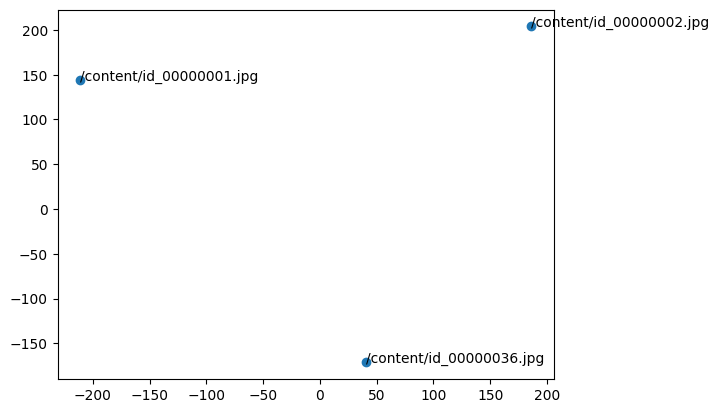

In [46]:
from tensorflow.keras.utils import to_categorical
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from sklearn.manifold import TSNE

# Cargar el modelo VGG19 preentrenado
vgg19 = VGG19(weights='imagenet', include_top=False, pooling='max', input_shape=(224, 224, 3))
vgg19.summary()

# Congelar las capas del modelo VGG19
for model_layer in vgg19.layers:
    model_layer.trainable = False

# Función para cargar imagen desde archivo local
def load_image(image_path):
    input_image = Image.open(image_path)
    resized_image = input_image.resize((224, 224))
    return resized_image

# Función para obtener el embedding de una imagen
def get_image_embeddings(object_image: Image):
    image_array = np.expand_dims(image.img_to_array(object_image), axis=0)
    image_embedding = vgg19.predict(image_array)  # Usamos el modelo VGG19
    return image_embedding

# Función para calcular similitud entre la imagen de referencia y las demás imágenes
def batch_get_image_embeddings(image_paths):
    images = [load_image(img_path) for img_path in image_paths]
    images_array = np.array([np.expand_dims(image.img_to_array(img), axis=0) for img in images])
    embeddings = vgg19.predict(np.vstack(images_array))  # Predicción en batch
    return embeddings

def get_similarity_score(reference_image_path, image_paths):
    reference_image = load_image(reference_image_path)
    reference_embedding = get_image_embeddings(reference_image)

    # Obtener embeddings de todas las imágenes
    image_embeddings = batch_get_image_embeddings(image_paths)

    # Calcular similitudes
    similarities = cosine_similarity(reference_embedding, image_embeddings)

    # Ordenar las imágenes por similitud
    similarities = [(idx, score) for idx, score in enumerate(similarities[0])]
    similarities.sort(key=lambda x: x[1], reverse=True)

    return similarities

# Función para mostrar la imagen
def show_image(image_path):
    image = mpimg.imread(image_path)
    imgplot = plt.imshow(image)
    plt.show()

# Función para realizar fine-tuning
def fine_tune_vgg19(num_classes, train_data, train_labels):
    # Añadir capas densas para clasificación
    x = Flatten()(vgg19.output)
    x = Dense(256, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)

    fine_tuned_model = Model(inputs=vgg19.input, outputs=x)

    # Congelar las capas del modelo VGG19
    for layer in vgg19.layers:
        layer.trainable = False

    fine_tuned_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo con los datos de ropa
    fine_tuned_model.fit(train_data, train_labels)

    return fine_tuned_model

# Datos de entrenamiento (ejemplo, deberás cargarlos desde tu dataset)
# Asegúrate de tener tus datos en las variables `train_data` y `train_labels`.
train_data = np.array([np.random.rand(224, 224, 3)])  # Ejemplo de datos (deberías cargar imágenes reales)
train_labels = np.array([np.random.randint(0, 23)])  # Ejemplo de etiquetas (modifica según tus clases)


# Convertir las etiquetas a formato one-hot
train_labels_one_hot = to_categorical(train_labels, num_classes=23)

# Realizar el fine-tuning (ejemplo con 23 clases)
fine_tuned_model = fine_tune_vgg19(num_classes=23, train_data=train_data, train_labels=train_labels_one_hot)


# Lista de imágenes para comparación
image_paths = ['/content/id_00000001.jpg', '/content/id_00000002.jpg', '/content/id_00000036.jpg']

# Calcular la similitud y mostrar las 5 imágenes más similares
similar_images = get_similarity_score('/content/efw.jpg', image_paths)

# Mostrar la imagen más similar
most_similar_image = similar_images[0][0]  # Primer imagen más similar
print(f"La imagen más similar es: {image_paths[most_similar_image]}")

# Mostrar las 5 imágenes más similares
for idx, score in similar_images[:5]:
    print(f"Imagen: {image_paths[idx]}, Similitud: {score}")

# Visualización de embeddings (si deseas analizar más a fondo las similitudes)
def visualize_embeddings(image_paths, embeddings):
    tsne = TSNE(n_components=2, perplexity=2)  # Ajusta el valor de perplexity
    reduced_embeddings = tsne.fit_transform(embeddings)

    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
    for i, img_path in enumerate(image_paths):
        plt.annotate(img_path, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
    plt.show()


# Realizar visualización de embeddings
image_embeddings = batch_get_image_embeddings(image_paths)
visualize_embeddings(image_paths, image_embeddings)


In [49]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical


vgg19 = VGG19(weights='imagenet', include_top=False,
              pooling='max', input_shape=(224, 224, 3))

# Añadir capa personalizada para clasificación
x = Flatten()(vgg19.output)
x = Dense(256, activation='relu')(x)  # Puedes cambiar el tamaño de la capa densa
x = Dense(23, activation='softmax')(x)  # Número de clases que tienes (ropa)

# Crear el nuevo modelo
fine_tuned_model = Model(inputs=vgg19.input, outputs=x)

# Congelar las capas iniciales
for layer in vgg19.layers:
    layer.trainable = False  # No entrenar las capas de VGG19

fine_tuned_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convierte las etiquetas a formato one-hot (asumiendo que las etiquetas son enteros)
train_labels = to_categorical(train_labels, num_classes=23)  # Aquí 23 es el número de clases

# Ahora puedes entrenar el modelo
fine_tuned_model.fit(train_data, train_labels)



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 3.8268


In [ ]:
# Función para cargar imagen desde archivo local
def load_image(image_path):
    """
    -----------------------------------------------------
    Carga y procesa la imagen proporcionada desde un archivo local.
    -----------------------------------------------------
    return: imagen redimensionada
    """
    input_image = Image.open(image_path)
    resized_image = input_image.resize((224, 224))
    return resized_image

# Función para obtener el embedding de una imagen
def get_image_embeddings(object_image: Image):
    """
    -----------------------------------------------------
    Convierte la imagen en un array 3D y añade la dimensión adicional para el modelo.
    -----------------------------------------------------
    return: embeddings de la imagen proporcionada.
    """
    image_array = np.expand_dims(image.img_to_array(object_image), axis=0)
    image_embedding = vgg19.predict(image_array)  # Aquí usamos el modelo VGG19 (puedes usar otro)
    return image_embedding

# Función para calcular la similitud entre una imagen de referencia y un conjunto de imágenes
def get_similarity_score(reference_image_url: str, image_array: list):
    """
    -----------------------------------------------------
    Recibe un enlace de imagen y un array de imágenes y calcula
    la similitud entre la imagen de referencia y las demás imágenes.
    Devuelve las imágenes más similares de mayor a menor.
    -----------------------------------------------------
    return: lista de imágenes más similares, ordenadas por similitud.
    """

    # Cargar la imagen de referencia desde el archivo o URL
    reference_image = load_image(reference_image_url)
    reference_embedding = get_image_embeddings(reference_image)

    # Obtener los embeddings y similitudes de las imágenes en el array
    similarities = []

    for idx, img_path in enumerate(image_array):
        img = load_image(img_path)  # Cargar cada imagen desde el array
        img_embedding = get_image_embeddings(img)  # Obtener el embedding de la imagen
        similarity_score = cosine_similarity(reference_embedding, img_embedding)  # Similaridad
        similarities.append((idx, similarity_score[0]))  # Almacenar la imagen y su similitud

    # Ordenar las imágenes por la similitud de mayor a menor
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Mostrar las imágenes más similares
    print("Imágenes más similares a la imagen de referencia:")
    for idx, score in similarities:
        print(f"Imagen {idx + 1}, Similaridad: {score}")

    return similarities


# Función para mostrar la imagen
def show_image(image_path):
    """
    -----------------------------------------------------
    Muestra una imagen usando matplotlib.
    -----------------------------------------------------
    """
    image = mpimg.imread(image_path)
    imgplot = plt.imshow(image)
    plt.show()


In [ ]:
image_paths =['11.jpg', '13.png', '14.jpg', '15.jpg', 'image-test.jpg']

similar_images = get_similarity_score('prueba.jpg', image_paths)
# Mostrar la imagen más similar, por ejemplo, mostrando la más similar

most_similar_image = similar_images[0][0]  # Primer imagen más similar


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Imágenes más similares a la imagen de referencia:
Imagen 3, Similaridad: [0.6651945]
Imagen 1, Similaridad: [0.5981367]
Imagen 5, Similaridad: [0.5749209]
Imagen 4, Similaridad: [0.56108564]
Imagen 2, Similaridad: [0.43589598]
